In [103]:
#mporting libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [104]:
path = '/content/drive/MyDrive/Data/rainfall_data.csv'

In [105]:
#data import
data = pd.read_csv(path, encoding= 'unicode_escape')

In [106]:
df = data.copy()

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   time                     1096 non-null   object 
 1   temperature_2m           1096 non-null   float64
 2   precipitation_hours (h)  1096 non-null   int64  
 3   windspeed_10m            1096 non-null   float64
 4   windgusts_10m            1096 non-null   float64
 5   rain_sum (mm)            1096 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 51.5+ KB


In [108]:
#check for null values
df.isna().sum()

time                       0
temperature_2m             0
precipitation_hours (h)    0
windspeed_10m              0
windgusts_10m              0
rain_sum (mm)              0
dtype: int64

In [109]:
type(df['time'][0])

str

In [110]:
# extracting day,month, day of week and weekdays/weekend from date column
df['time']=pd.to_datetime(df['time'])
df['month'] = df['time'].apply(lambda x : x.month)
df['week_number'] = df['time'].dt.strftime("%U")

In [111]:
df = df.drop(columns = ['time'])

In [112]:
df['week_number'] = df['week_number'].astype(int)

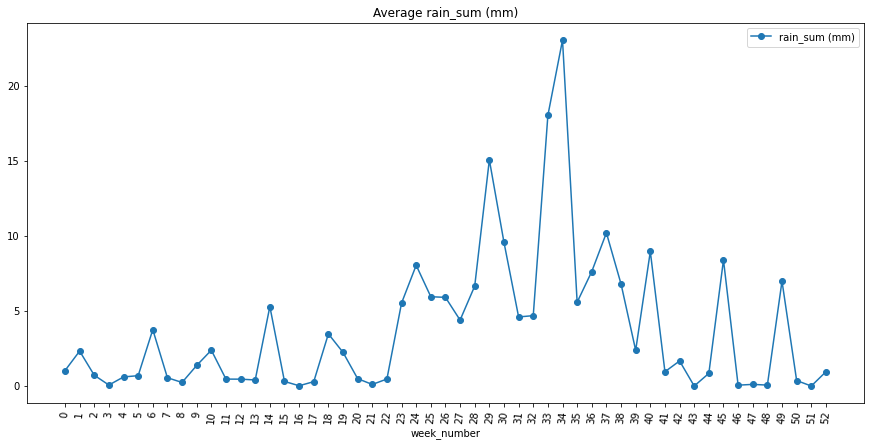

In [113]:
#ploting line graph
# group by week and get average rainfall
avg_rainfall = df.groupby('week_number')['rain_sum (mm)'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(15,7))
a=avg_rainfall.plot(legend=True,marker='o',title="Average rain_sum (mm)")
a.set_xticks(range(len(avg_rainfall)));
a.set_xticklabels(avg_rainfall.index.tolist(), rotation=85);

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temperature_2m           1096 non-null   float64
 1   precipitation_hours (h)  1096 non-null   int64  
 2   windspeed_10m            1096 non-null   float64
 3   windgusts_10m            1096 non-null   float64
 4   rain_sum (mm)            1096 non-null   float64
 5   month                    1096 non-null   int64  
 6   week_number              1096 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 60.1 KB


Outlier treatment

1. temperature

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


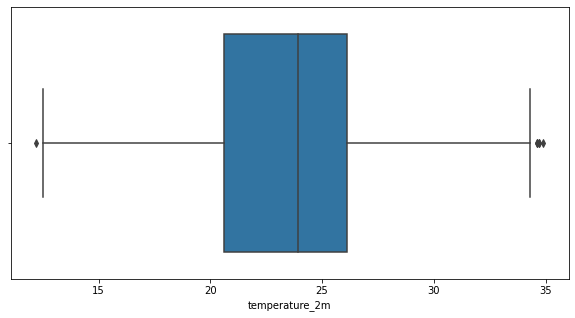

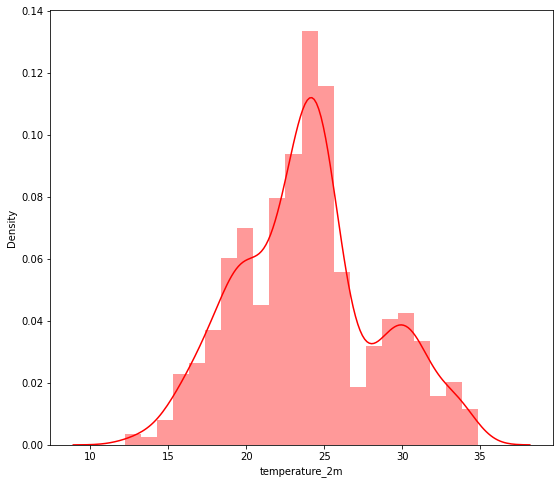

In [115]:
#plot
plt.figure(figsize=(10,5))
sns.boxplot(x = 'temperature_2m', data = df)
plt.figure(figsize=(9,8))
sns.distplot(df['temperature_2m'],color="r")

In [116]:
#setting outlier
def set_temp(x):
  if x>=34:
    return 34
  elif x<=14:
    return 14
  else: return x 

df["temperature_2m"] = df["temperature_2m"].apply(lambda x :set_temp(x))

2. precipitation_hours

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


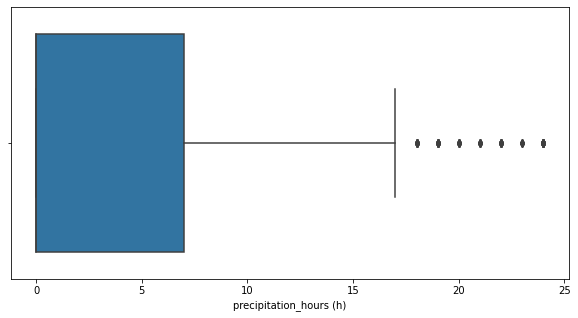

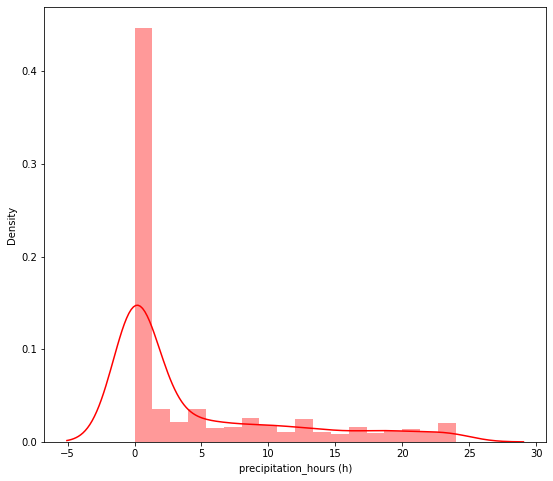

In [117]:
#plot
plt.figure(figsize=(10,5))
sns.boxplot(x = 'precipitation_hours (h)', data = df)
plt.figure(figsize=(9,8))
sns.distplot(df['precipitation_hours (h)'],color="r")

In [118]:
#setting outlier
def set_temp(x):
  if x>= 17:
    return 17

  else: return x 

df["precipitation_hours (h)"] = df["precipitation_hours (h)"].apply(lambda x :set_temp(x))

3. windspeed_10m

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


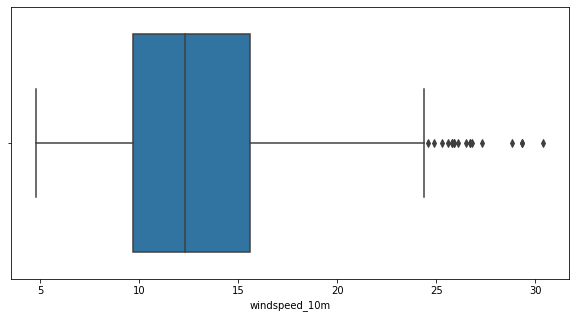

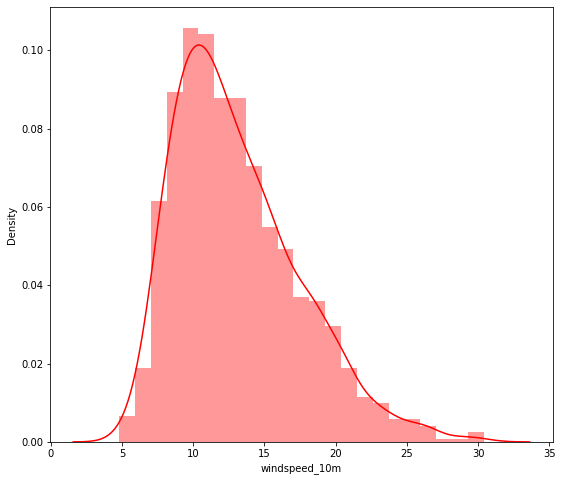

In [119]:
#plot
plt.figure(figsize=(10,5))
sns.boxplot(x = 'windspeed_10m', data = df)
plt.figure(figsize=(9,8))
sns.distplot(df['windspeed_10m'],color="r")

In [120]:
#setting outlier
def set_temp(x):
  if x>= 25:
    return 25
  elif x<=5:
    return 5

  else: return x 

df["windspeed_10m"] = df["windspeed_10m"].apply(lambda x :set_temp(x))

4. windgusts_10m

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


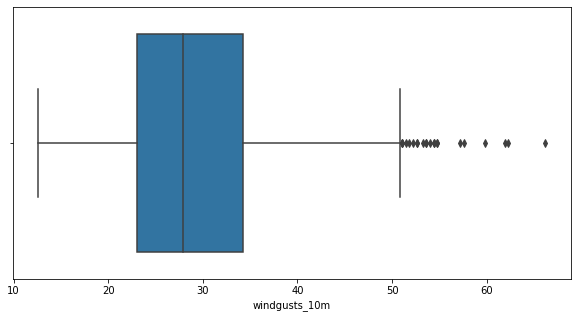

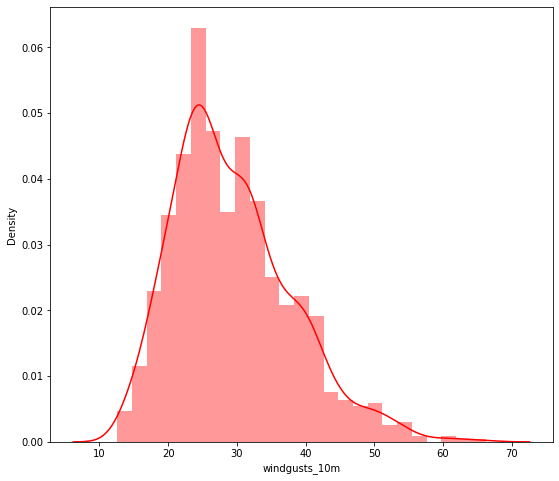

In [121]:
#plot
plt.figure(figsize=(10,5))
sns.boxplot(x = 'windgusts_10m', data = df)
plt.figure(figsize=(9,8))
sns.distplot(df['windgusts_10m'],color="r")

In [122]:
len(df[df["windgusts_10m"]> 55])

6

In [123]:
#setting outlier
def set_temp(x):
  if x>= 55:
    return 55

  else: return x 

df["windgusts_10m"] = df["windgusts_10m"].apply(lambda x :set_temp(x))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

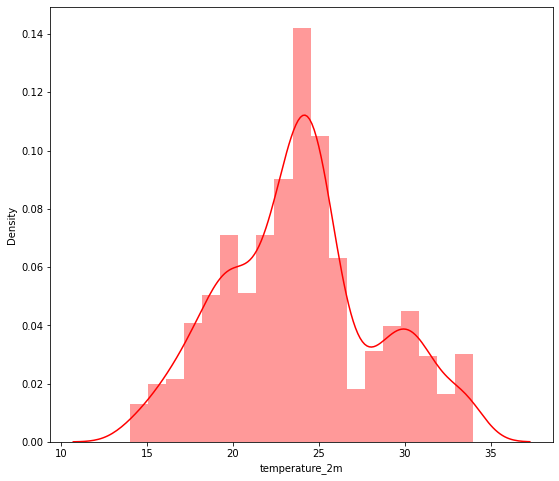

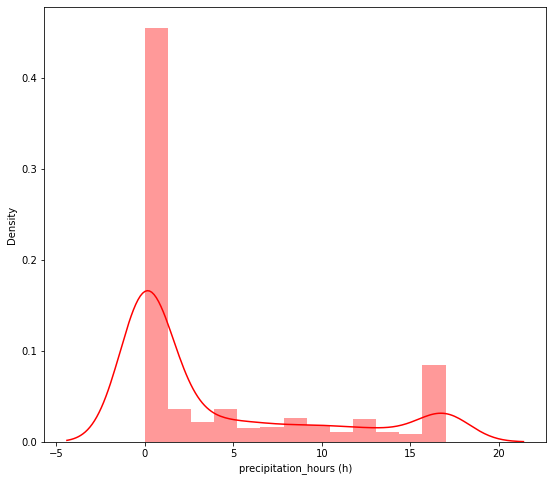

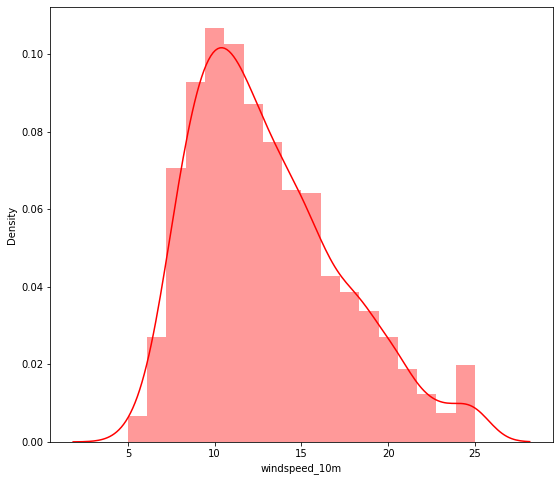

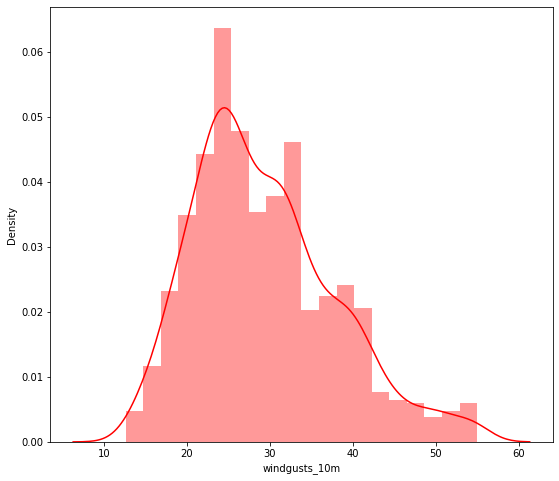

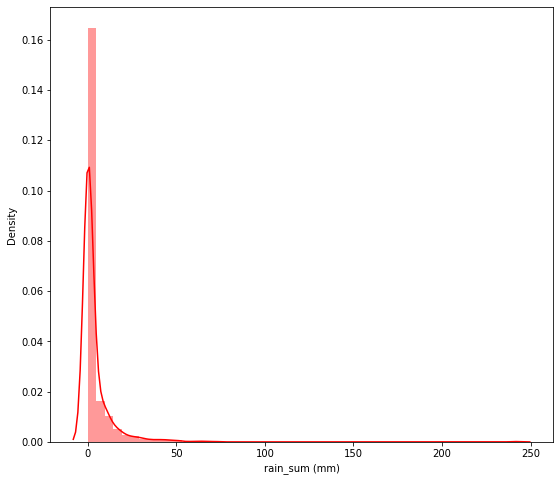

In [124]:
#data distribution for each variable
def plot(feature):
  plt.figure(figsize=(9,8))
  sns.distplot(df[feature],color="r")
  
for i in df.drop(columns=['month','week_number'],axis=1):
  plot(i)

In [125]:
continous_features = ['temperature_2m','precipitation_hours (h)', 'windgusts_10m', 'rain_sum (mm)' ]
categorical_features = ['month', 'week_number'] 

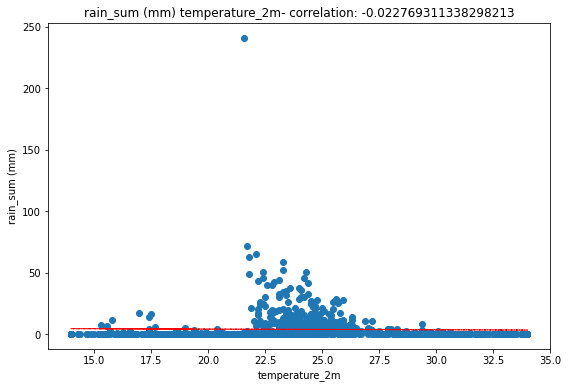

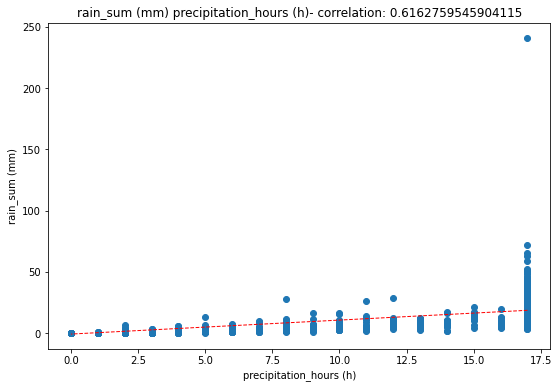

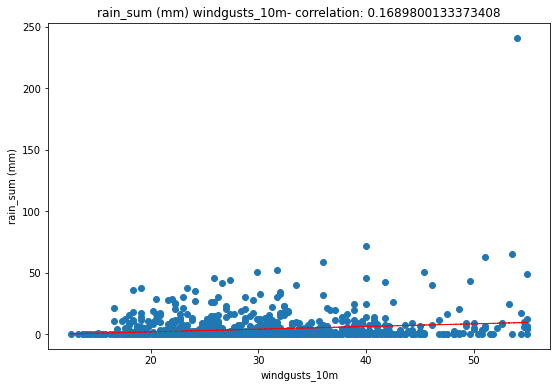

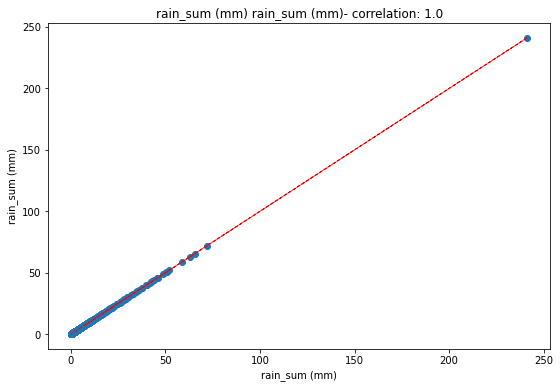

In [126]:
#check for continous feature vs target variable
for col in continous_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    continous_feature = df[col]
    label = df['rain_sum (mm)']
    correlation = continous_feature.corr(label)
    plt.scatter(x=continous_feature, y=label)
    plt.xlabel(col)
    plt.ylabel('rain_sum (mm)')
    ax.set_title('rain_sum (mm) ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['rain_sum (mm)'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

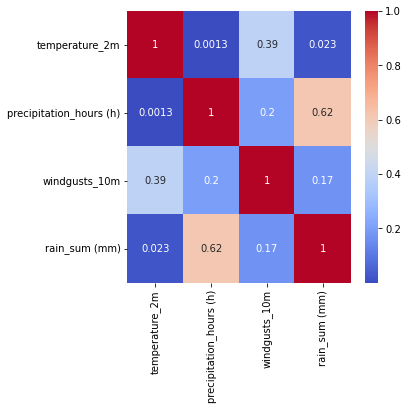

In [127]:
#check for correlation
plt.figure(figsize=(5,5))
correlation = df[continous_features].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temperature_2m           1096 non-null   float64
 1   precipitation_hours (h)  1096 non-null   int64  
 2   windspeed_10m            1096 non-null   float64
 3   windgusts_10m            1096 non-null   float64
 4   rain_sum (mm)            1096 non-null   float64
 5   month                    1096 non-null   int64  
 6   week_number              1096 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 60.1 KB


In [129]:
final_features = ['temperature_2m', 'precipitation_hours (h)','windgusts_10m', 'month', 'week_number']

In [130]:
X = df[final_features]
y = df['rain_sum (mm)']

In [131]:
#transformation of data 
from scipy.stats import zscore
#Train test split
X = df[final_features].apply(zscore)

In [132]:
#splitting train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [133]:
#create a function to compute Evaluation matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
score = pd.DataFrame(index = ['MSE', 'RMSE', 'r2', 'Adjusted r2'])
def get_evaluation_matrix(y_test, y_pred):
  
  MSE  = mean_squared_error((y_test), (y_pred))
  
  RMSE = np.sqrt(MSE)
  
  r2 = r2_score((y_test), (y_pred))
  
  Adj_r2 = 1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  
  lst = [MSE, RMSE, r2, Adj_r2]
  return lst

In [134]:
#import Lasso regressor and grid search cv
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso_ = Lasso()

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso_, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
lasso_regressor.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.350e+04, tolerance: 1.002e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.622e+03, tolerance: 4.212e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.374e+04, tolerance: 1.012e+01

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [135]:
#getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The optimum alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -82.98555788943791


In [136]:
#prediction for Lasso regressio
y_pred_lasso_test = lasso_regressor.predict(X_test)

In [137]:
#Evaluation matrices for Lasso regression
result = get_evaluation_matrix(y_test,y_pred_lasso_test)
score['Lasso'] = result
print(score)

                 Lasso
MSE          52.202117
RMSE          7.225103
r2            0.530881
Adjusted r2   0.519920


In [138]:
#import RandomForest Regressor 
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
#fitting model
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [139]:
#prediction for RandomForest
y_pred_rf = regressor_rf.predict(X_test)

In [140]:
#Evaluation matrices for RandomForest 
result = get_evaluation_matrix(y_test,y_pred_rf)
score['Random forest'] = result
print(score)

                 Lasso  Random forest
MSE          52.202117      39.413554
RMSE          7.225103       6.278021
r2            0.530881       0.645807
Adjusted r2   0.519920       0.637531
